Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path(r"/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

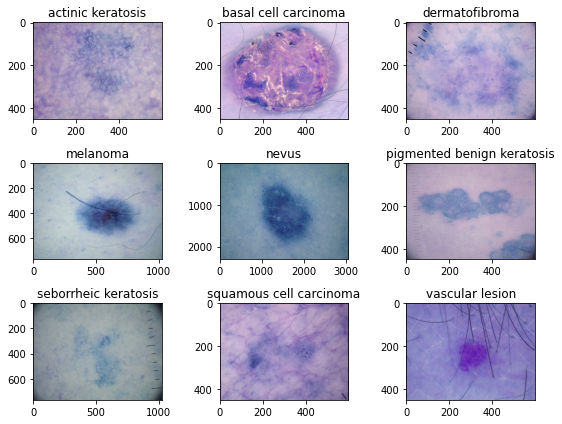

In [9]:
import matplotlib.pyplot as plt
import re
### your code goes here, you can use training or validation data to visualize
printed = []
k=1
plt.figure(figsize=(8,6))
for i in class_names:
    for j in val_ds.file_paths:
        x = re.search(i,j)
        if i not in printed and x:
            
            plt.subplot(3,3,k)
            img=cv2.imread(j)
            plt.imshow(img)
            plt.title(i)
            plt.tight_layout()
            k+=1
            printed.append(i)
plt.show() 

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
### Your code goes here
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
# scale=1.0/255
# model = Sequential()
# num_classes = 9
# model.add(layers.experimental.preprocessing.Rescaling(scale=scale, input_shape=(180, 180, 3)))

# model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())

# model.add(Dense(64, activation='relu'))
# # model.add(Activation('relu'))
# model.add(Dense(num_classes, activation='softmax'))
# # model.add(Activation('softmax'))

num_classes = 9

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 611s 2s/step - loss: 2.0478 - accuracy: 0.2506 - val_loss: 1.8164 - val_accuracy: 0.3624
Epoch 2/20
56/56 [==============================] - 2s 37ms/step - loss: 1.7063 - accuracy: 0.3828 - val_loss: 1.5169 - val_accuracy: 0.5011
Epoch 3/20
56/56 [==============================] - 2s 41ms/step - loss: 1.4539 - accuracy: 0.4905 - val_loss: 1.4104 - val_accuracy: 0.5168
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.3874 - accuracy: 0.5145 - val_loss: 1.4051 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 2s 37ms/step - loss: 1.3012 - accuracy: 0.5424 - val_loss: 1.3761 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 2s 37ms/step - loss: 1.2668 - accuracy: 0.5642 - val_loss: 1.3269 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 2s 37ms/step - loss: 1.1394 - accuracy: 0.5921 - val_loss: 1.3858 - val_accuracy: 0.5414
Epoch 8/20
56/56 [======

### Visualizing training results

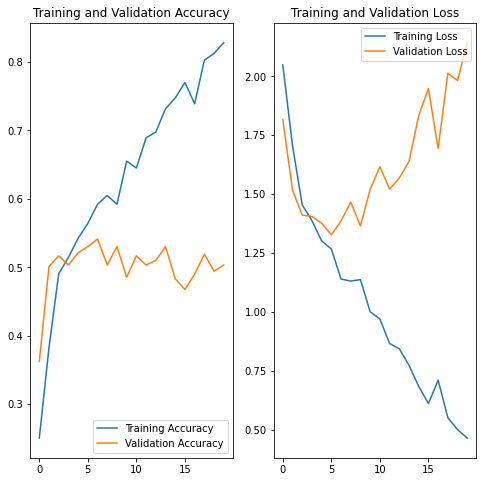

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
image_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(img_height, img_width),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

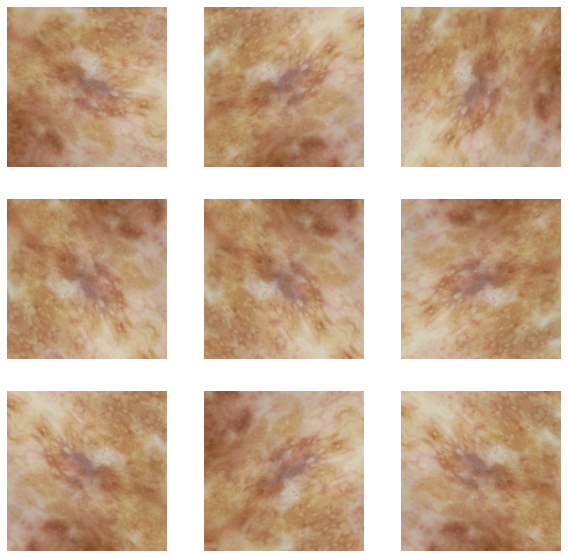

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
image, label = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = image_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from tensorflow.keras.layers import BatchNormalization

# model=Sequential()
# model.add(image_augmentation)

# model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())

# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dense(9))
# model.add(Activation('softmax'))

num_classes = 9

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
#   layers.experimental.preprocessing.RandomWidth(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2,0.3),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

# num_classes = 7

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(128,kernel_size=(3, 3), activation='relu',padding = 'Same',))
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))
# image_augmentation = tf.keras.Sequential([
#   layers.experimental.preprocessing.Resizing(img_height, img_width),
#   layers.experimental.preprocessing.Rescaling(1./255),
#   layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#   layers.experimental.preprocessing.RandomRotation(0.2),
# ])
# model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))
# model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))



### Compiling the model

In [19]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)## your training code

Epoch 1/20


56/56 [==============================] - 20s 239ms/step - loss: 2.2454 - accuracy: 0.2087 - val_loss: 2.1051 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 13s 238ms/step - loss: 1.9736 - accuracy: 0.2567 - val_loss: 1.8680 - val_accuracy: 0.3445
Epoch 3/20
56/56 [==============================] - 13s 238ms/step - loss: 1.7318 - accuracy: 0.3510 - val_loss: 1.7423 - val_accuracy: 0.3803
Epoch 4/20
56/56 [==============================] - 14s 242ms/step - loss: 1.6598 - accuracy: 0.3968 - val_loss: 1.6487 - val_accuracy: 0.4340
Epoch 5/20
56/56 [==============================] - 13s 241ms/step - loss: 1.5926 - accuracy: 0.4375 - val_loss: 1.6223 - val_accuracy: 0.4385
Epoch 6/20
56/56 [==============================] - 13s 239ms/step - loss: 1.5298 - accuracy: 0.4570 - val_loss: 1.6794 - val_accuracy: 0.4228
Epoch 7/20
56/56 [==============================] - 13s 241ms/step - loss: 1.4946 - accuracy: 0.4754 - val_loss: 1.4717 - val_accuracy: 0.5078
Epoch 8/20

### Visualizing the results

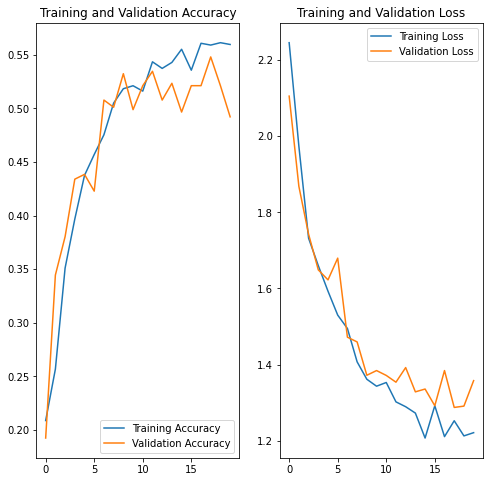

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?



*   Yes there is a improvement in the model in terms of overfitting. The training and validation accuracies are almost nearer and are around 60% and 55% respectively. But still we didn't get a good accurate model. For this purpose we will be proceeding with the third model where the class imbalance will be rectified.



#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
## Your code goes here.
## Your code goes here.
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*','*.jpg'),recursive=True)]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?


*   The class which has the least number of samples is seborrheic keratosis



#### - Which classes dominate the data in terms proportionate number of samples?



*   The class which has the most no of samples is pigmented benign keratosis




#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [23]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [24]:
path_to_training_dataset=r"/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train//"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train//actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3FA61842B0>: 100%|██████████| 500/500 [00:21<00:00, 23.49 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train//basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3FA61F2AF0>: 100%|██████████| 500/500 [00:23<00:00, 21.23 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train//dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3FA62C05B0>: 100%|██████████| 500/500 [00:23<00:00, 20.94 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train//melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4034097190>: 100%|██████████| 500/500 [01:47<00:00,  4.66 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train//nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2314x2067 at 0x7F3FA63051F0>: 100%|██████████| 500/500 [01:27<00:00,  5.71 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train//pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4021DFE3D0>: 100%|██████████| 500/500 [00:21<00:00, 23.80 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train//seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F402187F670>: 100%|██████████| 500/500 [00:48<00:00, 10.27 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train//squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F40205AC220>: 100%|██████████| 500/500 [00:22<00:00, 22.41 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train//vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4021CC7550>: 100%|██████████| 500/500 [00:21<00:00, 23.04 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [25]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [26]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0024471.jpg_a0f9a1cd-a12e-45c9-bf14-705e32b63d73.jpg',
 '/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026422.jpg_79e6c2eb-0466-428d-8756-186e60665fc7.jpg',
 '/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028479.jpg_d4fc42b6-cb5e-4140-8f22-32cb21c37a1a.jpg',
 '/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028449.jpg_93db0405-aa37-4ea4-9a1b-cef62b637d97.jpg',
 '/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Ima

In [27]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [28]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [29]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [30]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [31]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [32]:
data_dir_train=r"/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train//"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size= batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [33]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='training', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create your model (make sure to include normalization)

In [34]:
## your code goes here
## your code goes here
# scale=1.0/255
# model = Sequential()
# model.add(layers.experimental.preprocessing.Rescaling(scale=scale, input_shape=(180, 180, 3)))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())

# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dense(9))
# model.add(Activation('softmax'))

num_classes = 9

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),
#   layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#   layers.experimental.preprocessing.RandomRotation(0.2),
# #   layers.experimental.preprocessing.RandomWidth(0.2),
#   layers.experimental.preprocessing.RandomZoom(0.2,0.3),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [35]:
## your code goes here
## your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [36]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
) # your model fit code

Epoch 1/50
169/169 [==============================] - 72s 409ms/step - loss: 2.1059 - accuracy: 0.2107 - val_loss: 1.8332 - val_accuracy: 0.3364
Epoch 2/50
169/169 [==============================] - 54s 312ms/step - loss: 1.5534 - accuracy: 0.4082 - val_loss: 1.4377 - val_accuracy: 0.4703
Epoch 3/50
169/169 [==============================] - 53s 309ms/step - loss: 1.3555 - accuracy: 0.4846 - val_loss: 1.2944 - val_accuracy: 0.5389
Epoch 4/50
169/169 [==============================] - 54s 318ms/step - loss: 1.2182 - accuracy: 0.5382 - val_loss: 1.2062 - val_accuracy: 0.5662
Epoch 5/50
169/169 [==============================] - 53s 309ms/step - loss: 1.1108 - accuracy: 0.5820 - val_loss: 0.9893 - val_accuracy: 0.6434
Epoch 6/50
169/169 [==============================] - 69s 405ms/step - loss: 1.0001 - accuracy: 0.6352 - val_loss: 1.0228 - val_accuracy: 0.6395
Epoch 7/50
169/169 [==============================] - 53s 310ms/step - loss: 0.9301 - accuracy: 0.6504 - val_loss: 1.1203 - val_ac

#### **Todo:**  Visualize the model results

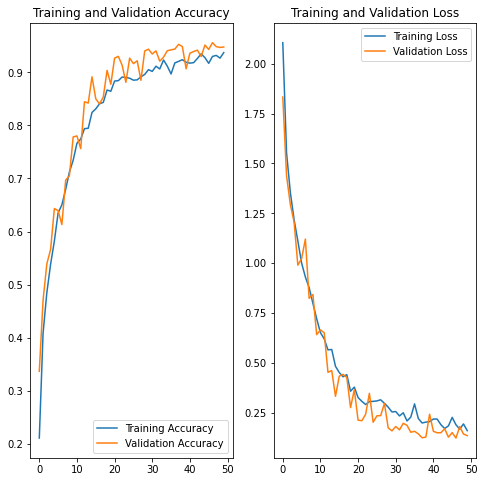

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?


*   From the evidence of this, we can clearly see that model's accuracy increased significantly, as the training accuracy is crossing 96% in the diagram and the loss is close to 0.15.

*  Similarly, the validation accuracy is also about 94% near the end of the 50 epochs.

*  Hence, we can say our model is an efficient model, as it removed the overfitting issue and also increased the accuracy of the model.





